<a href="https://colab.research.google.com/github/kelngu/python-for-math/blob/main/Exploration%20Assignments/Exploration2_Prime_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prime Exploration

By Conrad Ainslie, Akshita Bafna, Burleigh Charlton, Yang Li, Kevin Nguyen

#Introduction 

Hello! Our topic for Exploration 2 is Prime numbers. We are going to explore two aspects of prime numners. First. we are going to be exploring the logarthmic approxiamtion of the prime counting function using $li(x)$ function. We also graph the error of the logarhtmic integral. The second aspect we will be exploring is tsting the location and strength of pseudoprimes. We will be doing so using the Fermat test. A pseudoprime is a number that could be a prime, but who real nature is still unknown. 
This exploration helped us explore more about the prime numbers and their functionalities, and dig deeper into our learnings and research that we did in Notebook 3. 

#Imports and Preliminary Code

In [ ]:
#imports for making our images
import numpy as np
import matplotlib.pyplot as plt
from mpmath import li
from PIL import Image, ImageDraw # Load the package.
import math 

In [ ]:
#stuff we have 'borrowed' from marty in notebook 3
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags


def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

def primes_upto(x,primes):
  '''
  Gives primes up to x from a list of primes, primarily used as pi(x), the prime counting function.
  '''
  return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

# Prime Number Theorem with MatPlotLib

In this exploration, our group is interested in how well the Logarithmic Integral $li(x)$ approximates the prime-counting function. The prime-counting function is the function counting the number of prime numbers less than or equal to some real number $x$, denoted as $\pi(x)$. 

The Prime Number Theorem says that the number of primes between 0 and X is approximately $$li(x) =  \int_{0}^{x} \frac{1}{ln(t)} \,dt $$

The graphing process as follow:

(1) Define a faster prime counting function $\pi(x)$. 

(2) Calculate logarithmic integral $li(x)$

(3) Plot the MatPlotLib image of the error of $li(x)$

##Define a faster prime counting function $\pi(x)$

The code used in notebook 3 gets exponentially slower the larger the value of x is, therefore before plotting anything, we need to redefine the prime-counting function. 

In [ ]:
def primescountingfast(x_vals,primes): #input is an array of values of x length and a precalculated array of ordered primes from 0 to max(x_vals)
  '''
  Gives number of primes up to x from a list of primes, primarily used as pi(x), the prime counting function. 
  Make sure x_vals is ordered from smallest to largest, anything from linspace or range works, just has to be ordered from min to max
  '''
  indx1=1
  num_of=np.concatenate((np.zeros_like(x_vals),np.zeros(1)),axis=None) #making an array of zeros, size len(x_vals)+1
  for x in x_vals:
    num_of[indx1]=num_of[indx1-1] #starting from the last number of primes below the last x, basically cheating off the person who came before you
    a=num_of[indx1-1]
    for p in primes[int(a):]:#counts primes from last x to next x
      if p<=x:
        num_of[indx1]+=1
      else:
        continue #leaves the inner for loop when prime gets bigger than current x
    indx1+=1
  return [num_of[x] for x in range(1,len(num_of))] # List comprehension recovers the number of primes for each x in x vals.

In [ ]:
n=10000 
x_values = np.linspace(0,n,1001)
primelistn = np.asarray(where(isprime_list(n)))
%timeit pix_value = np.array([primes_upto(x,primelistn) for x in x_values]) 
%timeit pix_values = np.array(primescountingfast(x_values,primelistn))
''' second function is around two times faster'''

1 loop, best of 5: 2.13 s per loop
1 loop, best of 5: 995 ms per loop


' second function is around two times faster'

`primescountingfast(x_values,primeslistn)` is a faster way of calculating the prime-counting function.

##Calculate logarithmic integral $li(x)$

After we have the prime-counting function, we need to find the `logarithmic integral of $x$` since the goal of this exploration is to find how $li(x)$ approximates $\pi(x)$. 

The code below calculates logarithmic integral of $x$.

In [ ]:
n=1000000
primelistn = np.asarray(where(isprime_list(n))) #might take a little while
x_values = np.linspace(0,n,10001)
#pix_values = np.array([primes_upto(x,primelistn) for x in x_values]) #this is super slow for large arrays of primes, dont use
pix_values = np.array(primescountingfast(x_values,primelistn)) #faster version of above function, still gonna take awhile
lix=[li(x) for x in x_values] #calculates logarithmic integral of x

##Plot the MatPlotLib image of the error of $li(x)$

After we have both the prime-counting function $\pi(x)$ and logarithmic integral $li(x)$, we can develop our MatPlotLib image. 

The code for MatPlotLib image is as follows.

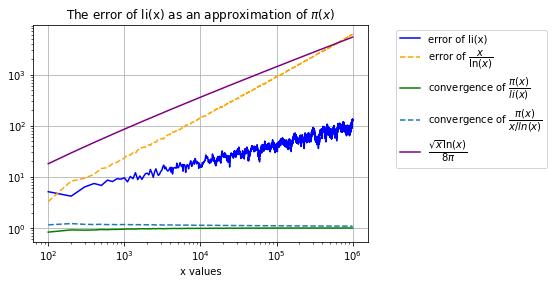

In [ ]:
plt.plot(x_values[1:],abs(pix_values[1:]-lix[1:]),label='error of li(x)',color='blue') #main error term
plt.plot(x_values[1:],abs(pix_values[1:]-x_values[1:]/np.log(x_values[1:])),label='error of $\dfrac{x}{\ln{(x)}}$',linestyle='--',color='orange') #while x/log(x) can be used to approximate primes it is far worse than li(x)
plt.plot(x_values[1:],abs(pix_values[1:]/lix[1:]),label='convergence of $\dfrac{\pi(x)}{li(x)}$',color='green')#this small green line is to show that the ratio of pi(x)/li(x) converges to 1 very quickly
plt.plot(x_values[1:],abs(pix_values[1:]/(x_values[1:]/np.log(x_values[1:]))),label='convergence of $\dfrac{\pi(x)}{x/ln(x)}$',linestyle='--')
plt.xscale('log')
plt.yscale('log')
bound2=np.array([x**(1/2)*np.log(x)/8*np.pi for x in x_values[1:]])
plt.plot(x_values[1:],bound2[0:],label='$\dfrac{\sqrt{x}\ln(x)}{8\pi}$',color='purple')
plt.title('The error of li(x) as an approximation of $\pi(x)$')
plt.xlabel('x values')
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),) 
'''
There is a huge problem with doing this project in python and its that we cant actually calculate enough primes to easily show that the error terms are remotley closely bounded by
$\dfrac{\sqrt{x}\ln{x}}{8\pi}$, we would need to calculate billions of primes to demonstrate the fact that the cubic root of x times ln(x) diveded by 8pi isn't a bound for pi(x)-li(x).
'''
plt.show()

In the image above, the horizontal axis indicates the number x and the vertical axis indicates the absolute value of the difference between the prime-counting function $\pi(x)$ and the logarithmic integral $li(x)$, which is the error of $li(x)$ as an approximation of $\pi(x)$. 

For the lines contained in the graph:

The error of $li(x)$ is the jagged blue line. The convergence of $\frac{\pi(x)}{li(x)}$ is the green line and this line converges very quickly to $10^0 = 1$. This means even though the error of li(x) as an approximation goes forever, it is still a good approximation of $\pi(x)$ as $li(x)$ gets closer to $\pi(x)$the larger x gets.

The orange dotted line is the error of $\frac{x}{ln(x)}$ as an approximation of $\pi(x)$, it shows how $\frac{x}{ln(x)}$ is a worse approximation of $\pi(x)$ when compared to $li(x)$ as the error of this approximation grows far faster. Furthermore, the dotted red line shows the convergence rate of $\frac{\pi(x)}{x/ln(x)}$ which demonstrates why $li(x)$ is a far better approximation as $\frac{\pi(x)}{li(x)}$ converges to 1 far faster.

The purple line represents $\frac{\sqrt(x)ln(x)}{8\pi}$. This line means, if we assume the Reimann Hypothesis is true, that the error of $li(x)$ is bounded above by this line. Sadly, colab is unable to calculate enough primes for us to demonstrate that the error eventually approaches this line.

# The Fermat Pseudoprimes

This exploration focuses on using PIL to show the location as well as the 'strength'[<sup>1</sup>](#fn1 "a pseudoprimes strength is dependent on how many or which primes witness its primality in the fermat test") of different pseudoprimes using Fermat Test. Fermat's Little Theorem states that if $p$ is a prime and $a$ is not divisible by $p$, then $$a^{p-1} mod (p) = 1$$  
The general graphing process is as follows:
1.   Initiate an all black square
2.   Check all numbers with Fermat test using the first 250 primes
3.   Each time a number is witnessed as prime, we add it to the blue to red gradient
4.   With our map of primes, we colored some strong pseudoprimes in red while a lot of weak pseudoprimes will be in blue. 
5.   Overlay all true primes in a grey color

The Fermat Primality Test will always overestimate the amount of primes because while every prime will pass the test, there are non-prime numbers that the Fermat Test would determine the as prime also. These are considered to be pseudoprimes, and with respect to the Fermat Primality Test, the very difficult to detect pseudoprimes are called Carmichael numbers. We can see a few of these numbers in our images. Among 4 factor Carmichael numbers we have 41041 and 627045 clearly visible as red dots in our images. We also get several quasi-Carmichael numbers making up most of our red/purple dots at 35, 77, 143, 165, 187, 209, 221, 231, 247, and many others.





##Generate Prime List
Here we create a prime list using the seive for use in imaging.

In [ ]:

bigprimelist = np.asarray(where(isprime_list(1024*1024)))

##Fermat Test Code
Here is our implementation of the Fermat Test, where it takes a number to test and a value to witness primes until   
e.g.   
an input of 67,5 would attempt to witness a = 2,3,5,7,13 against 67 and produce an array of 1s and 0s indicating if witnessing occured or not

In [ ]:
def fermat_test(n, a):
  '''
  takes a number n to test
  and the first  as a witness
  returns true if a witness n as prime
  a^n-1 mod n = 0 is evidence for primality
  fermat_test: num, num -> array 
  '''
  if n==0:
    return np.zeros((1,a))
  results = np.zeros( (1,a) )
  index=0
  for i in primelist100000[0:a]:
    if (i<n-1):
      results[0,index] = (pow(int(i), n-1, n) == 1)
    index+=1
  return results


To ensure that our Fermat's Test script was properly running, we ran a quick test and achieved the result we are looking for. 

In [ ]:
print(fermat_test(5,1))
print(pow(2,4,5))

[[1.]]
1


##Create Array of Fermat Test Results
Here we generate an array of the fermat test such that each pixel has an entry in the array with corresponding values to match its primality strength from the Fermat Test. Here we are using the first 250 primes as witnesses to each of our 1048576 values.

In [ ]:
#This one takes honestly forever to run, but it does!
#i recommend going and getting coffee while it runs
fermat_test_array_for_heatmap = np.asarray([fermat_test(i,250) for i in range(0,1024*1024)])

##PIL: Image Submission
The image below has pixelwise information. The number 0 though 1048576 are arranged in a 1024 by 1024 square below with each pixel corresponding to a number. Using the array of fermat test results we count the values of 1 corresponding to that value and attach that to a gradient from blue to red. i.e. numbers that get verified by under 10 a values will be a very dark blue, and higher values will be red to purple.    
Then we overlay the true primes on top of this image in a light grey.   
For the sake of interpretation the design choice to make any pseudoprime with greater than 60 verifiations take up 3 extra pixels in that same gradient was made.   
In the image below there are several bright red dots, I beleive these are Carmichael numbers as they are witnessed to be prime by the first 250 primes in the fermat test. This fits as according to [the OEIS Carmichael number sequence](https://oeis.org/A055553) we should have approximatly 43 Carmichael numbers below 1 million. We also see several purple dots, these are somewhat strong pseudoprimes, and potentially lower order Carmichael numbers called quasi-Carmichael numbers, our data points line up with the [sequence here](https://oeis.org/A257750).   




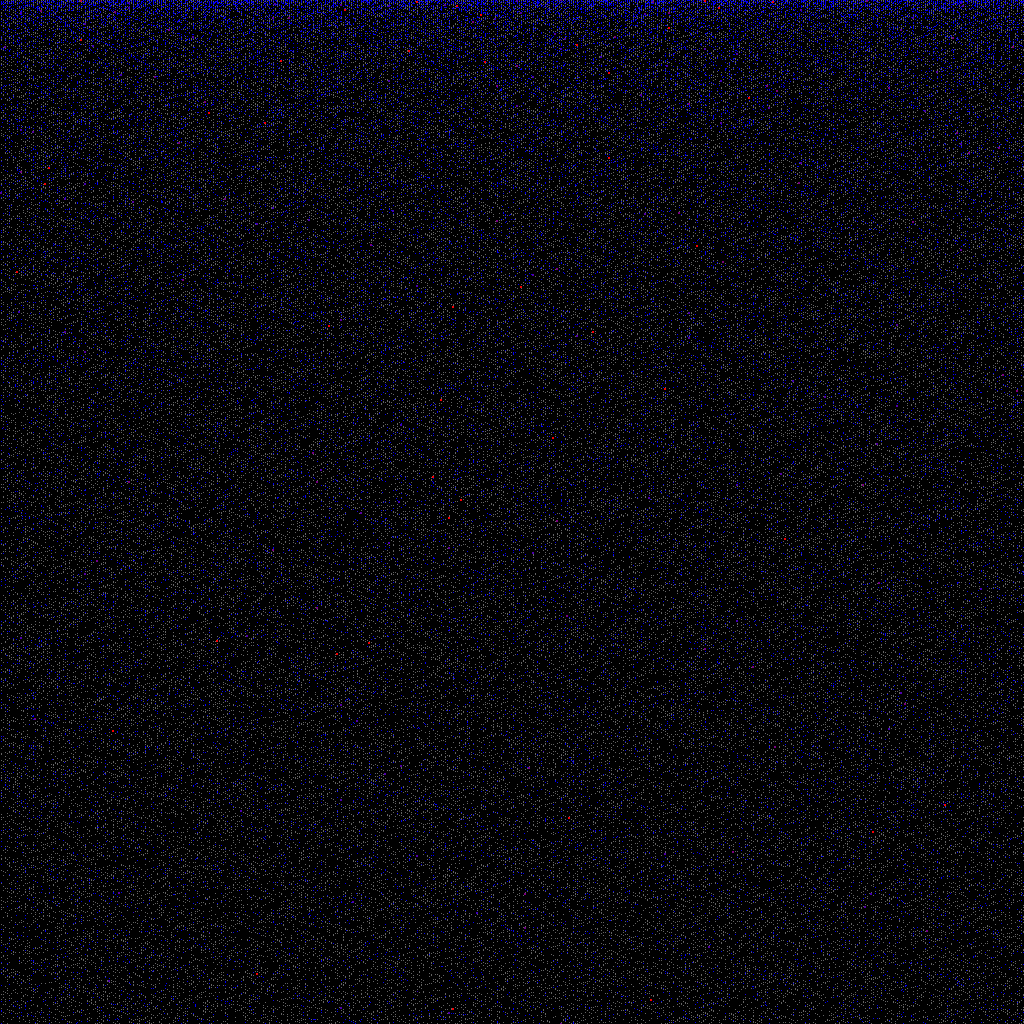

In [ ]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        fermattestresults = (np.count_nonzero(fermat_test_array_for_heatmap[(1024*y)+x][0,0:250] ==1))
        if (fermattestresults>0 ):
          primesquare[y,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
          if (x+(1024*y) in bigprimelist): #color the primes in grey
            primesquare[y,x] = [100,100,100] 
          #now lets enlarge the confident pseudoprimes with surrounding color
          #this slightly dilutes our image, but makes clear where they are
          if (fermattestresults>60 and x+(1024*y) not in bigprimelist):
            primesquare[y,x-1] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
            primesquare[y-1,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
            primesquare[y-1,x-1] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed


img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

Given more time I would like to explore the idea of more iterations and different tests to find Lucas Carmichael numbers and specific types of pseudoprimes. A better gradient color for heatmap would also be ideal considering that very weak pseudoprimes still get full satuation.

##Process
The following code blocks illustrate the process we went through to get to the final result. For exploration and curiosity purposes (but not submission purposes), we have also included some code that generates a GIF file, which, rather than the code being part of our main submission, should explain more about how our design choices are made.

In [ ]:
primelist100000 = np.asarray(where(isprime_list(100000)))

###Create Arrays of Fermat Test Results

Here I create a small list of fermat tuples into an array
Its stuctured such that each pixel has an entry in the array with corresponding values to match its primality strength from the Fermat Test. 
This takes a bit as we have to do over 260 million calculations.

In [ ]:
#generates an array of 10 tuples 1 by 256*256 in length
#tuples are the results of the fermat test on the first 10 primes
list_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,256*256)])

print(list_of_fermat_tests_to_10[2][0,0:3])
print((list_of_fermat_tests_to_10[2])[0,3:6])
print((list_of_fermat_tests_to_10[2])[0,6:9])

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


Here are larger lists, to 10, to 3, and to 250

In [ ]:
#these take a bit to run
biglist_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,1024*1024)])

In [ ]:
biglist_of_fermat_tests_to_3 = np.asarray([fermat_test(i,3) for i in range(0,1024*1024)])

In [ ]:
#This one takes honestly forever to run, but it does!
fermat_test_array_for_heatmap = np.asarray([fermat_test(i,250) for i in range(0,1024*1024)])

###Seive Image

This is a codeblock that shows all of the primes from the seive. We can see the black square as all positive integers, and green dots are all the primes.

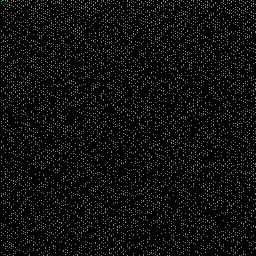

In [ ]:

primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in primelist100000):
        primesquare[y,x] = [0,180,180]

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

###Fermat Test to 10 Image
Here is that same square but with fermat tests. 
We can see here that they are quite similar, this speaks to the accuracy of the fermat test when taken with the first 10 primes.

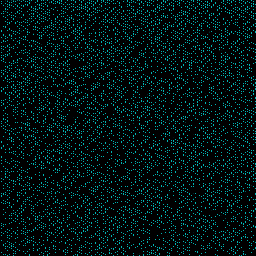

In [ ]:
##This generates a list of primes by my fermat test
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
        primesquare[y,x] = [0,(20*np.count_nonzero(list_of_fermat_tests_to_10[(256*y)+x])),(20*np.count_nonzero(list_of_fermat_tests_to_10[(256*y)+x]))] # Red = y, Green = 0, Blue = 1-y
img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

###Fermat Test to 10 with Overlayed Primes
Here is the first implementation. This maps the first 4 primes to red, the next three green, and the others to blue among the first 10 primes. Then we color every true prime grey so that we can see the pseudoprimes. 

Here we see a few very bright specks, of varying color. They are few and far between, but rather apparent. I was hoping to see a particular pattern of where these are located. The only qualitative thing I can say is that the are more common among the top half of our square corresponding to numbers less that 500,000

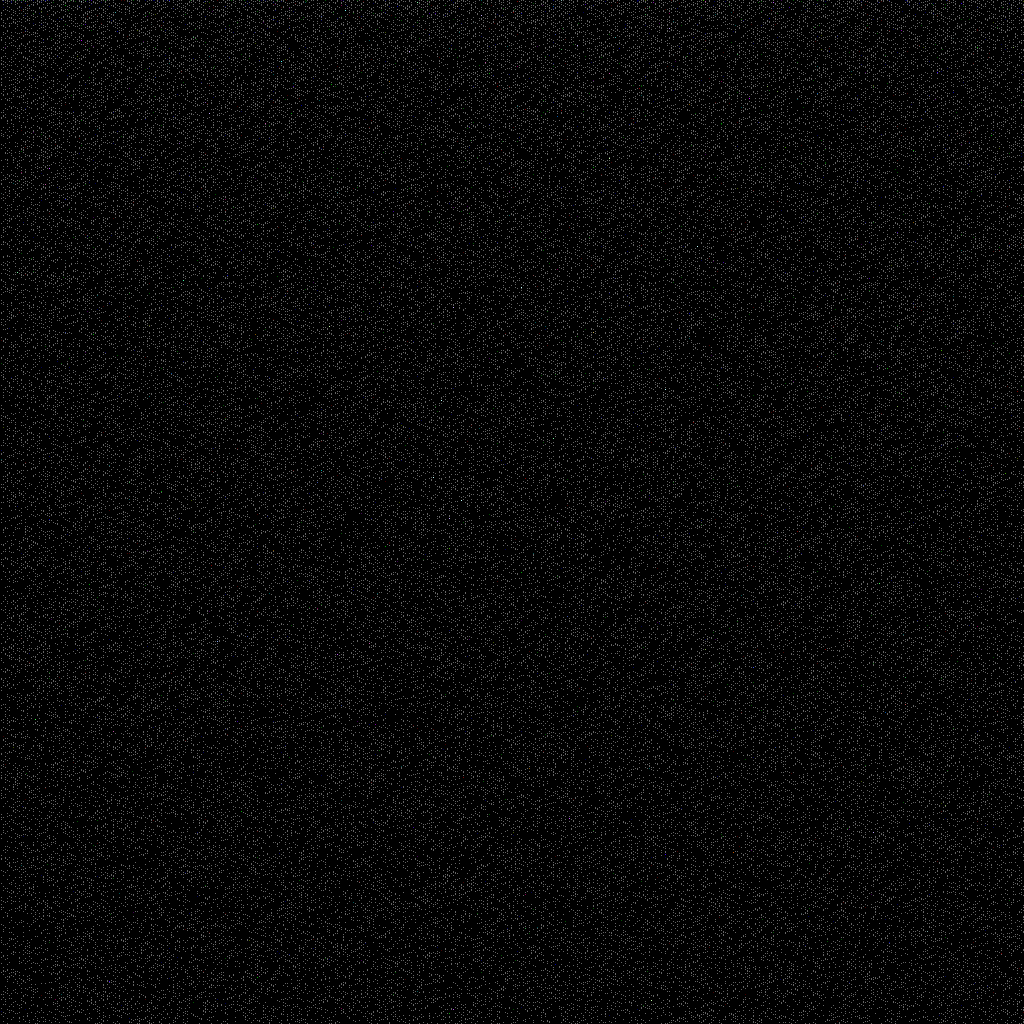

In [ ]:
##by segments of primes
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        primesquare[y,x] = [64*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,0:3] ==1)), #add red if witnessed by first 3 primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,3:6] ==1)), #add green if witnessed by next three primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,6:9] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [100,100,100] 

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

###Fermat Test to 3 with Overlayed Primes
This is a rather interesting image.   
First we iterate through applying the fermat test to each pixel with a = 2, 3, 5, and coloring pixels that pass that primality test red, green, and blue respectively. This will net us some results of various colors as well as combinations.   
Next we layer on a grey color on every true prime.   
What this shows us are the pseudoprimes of the three tests that we have run. Pixels that are red are not truly primes, but are instead numbers that pass $2^{n-1} mod (n) = 1$, but are not a prime.

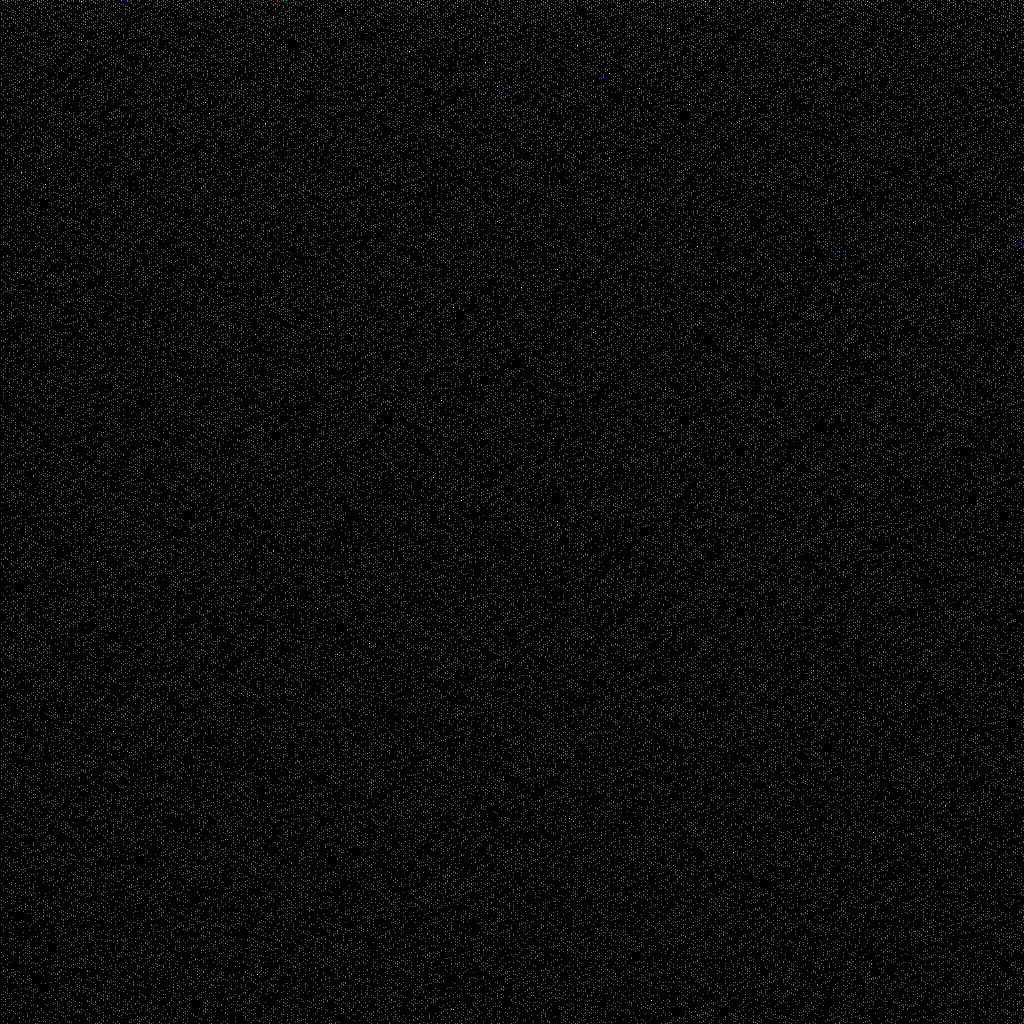

In [ ]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
        primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [100,100,100] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

###Fermat Test to 250 heatmap
What we're doing here is a little different. Using an array we generated earlier, we took the fermat test to the first. 

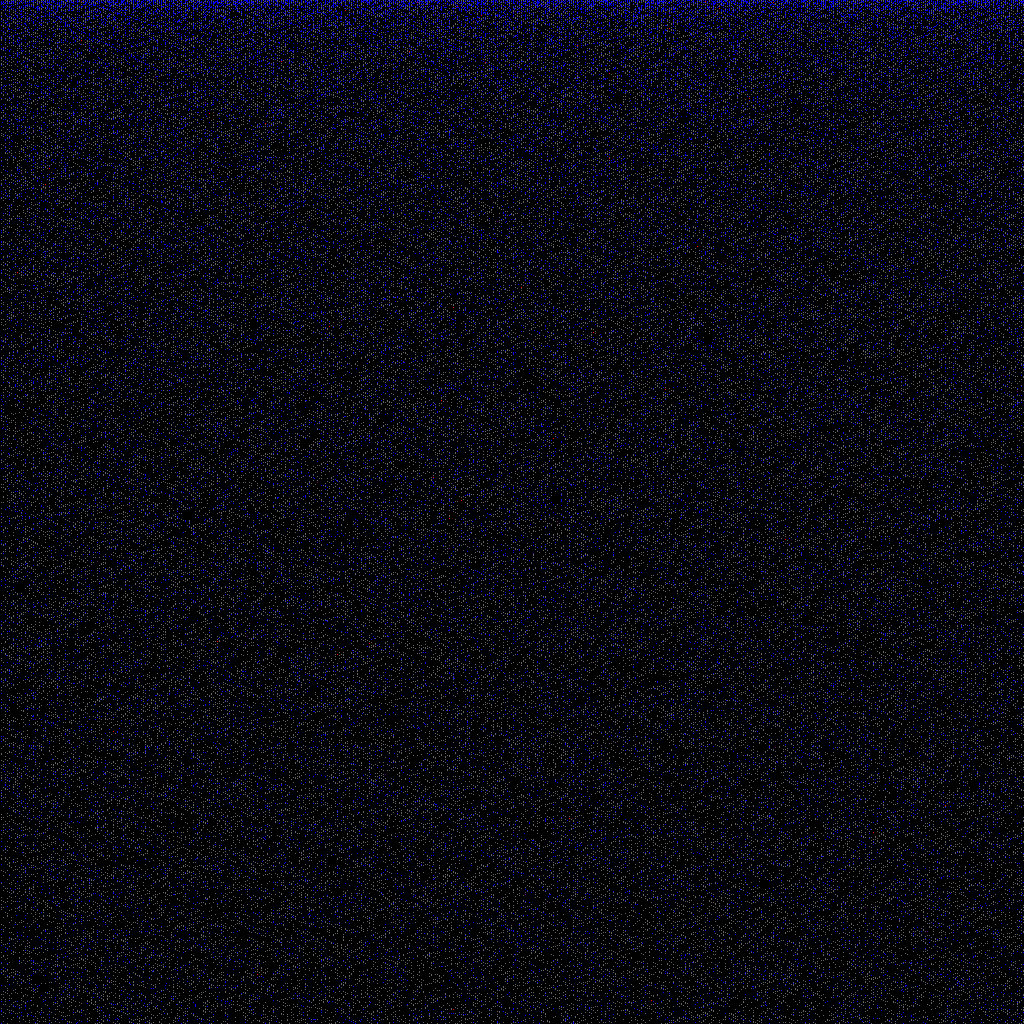

In [ ]:

primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        fermattestresults = (np.count_nonzero(fermat_test_array_for_heatmap[(1024*y)+x][0,0:250] ==1))
        if (fermattestresults>0 ):
          primesquare[y,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
          if (x+(1024*y) in bigprimelist):
            primesquare[y,x] = [100,100,100] 

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

In [ ]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        fermattestresults = (np.count_nonzero(fermat_test_array_for_heatmap[(1024*y)+x][0,0:100] ==1))
        if (fermattestresults>0 ):
          primesquare[y,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
          if (x+(1024*y) in bigprimelist):
            primesquare[y,x] = [100,100,100] 
          if (fermattestresults>200 ):
            primesquare[y-1,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed
            primesquare[y-1,x] = [fermattestresults, #start with no red and add as we get more tests passing
                              0,
                              250-fermattestresults] #start fully blue and remove as we get more tests passed


img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

###Gif Making
This isn't meant to be turned in, but is rather fun.  


This is a function that makes boxes as above, but takes an input for how dense the cyan color should be   
it is for use in the gif making

In [ ]:
def makeprimesquare(d):
  '''
  makes a prime square of fermat numbers
  then places true primes of d color density
  '''    
  primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
  for x in range(1024):
      for y in range(1024):
            primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
            if (d>51):          
              if (x+(1024*y) in bigprimelist):
                primesquare[y,x] = [0,d,d] # Red = y, Green = 0, Blue = 1-y

  img = Image.fromarray(primesquare) # Create an image from the array.
  return img

This generates a gif of growing cyan color on the true primes 

In [ ]:
images = []

max_color = 200
step = 25
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)

for i in range(0, max_color, step):
    im = makeprimesquare(i)
    img = Image.fromarray(primesquare) # Create an image from the array.
    images.append(im)

images[0].save('primes.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=400, loop=0)

In [ ]:
from sympy import isprime


def generate_xy(n=10):
    direction = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    d = 0

    location = [0, 0]

    i = t = 0
    c = 1

    for _ in range(n):
        yield location
        location = [sum(l) for l in zip(location, direction[d])]
        i += 1

        if i == c:
            d = (d+1) % 4
            t += 1
            i = 0
            if t == 2:
                t = 0
                c += 1

plt.axis([-20, 20, -20, 20])

for number, (x, y) in enumerate(generate_xy(1521), 1):
    plt.plot(x, y, "ro" if isprime(number) else "bo")

In [ ]:
#stuff we have 'borrowed' from marty in notebook 3
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags


def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

def primes_upto(x,primes):
  '''
  Gives primes up to x from a list of primes, primarily used as pi(x), the prime counting function.
  '''
  return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

#THE END